In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./NLP/data.csv", encoding='iso-8859-1', names=["text", "label"])
df.head()

,text,label
0,Sentence,Sentiment
1,The GeoSolutions technology will leverage Bene...,positive
2,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
3,"For the last quarter of 2010 , Componenta 's n...",positive
4,According to the Finnish-Russian Chamber of Co...,neutral


In [3]:
df.drop(0, inplace=True)

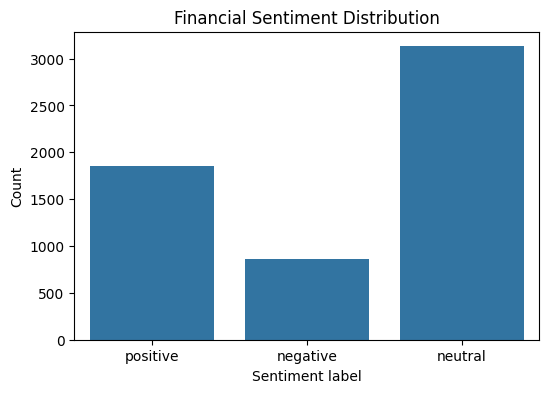

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', )
plt.title("Financial Sentiment Distribution")
plt.xlabel("Sentiment label")
plt.ylabel("Count")
plt.show()

In [5]:
new_df = df[df['label'] != 'neutral'].reset_index(drop=True)

In [6]:
positive_df = new_df[new_df['label'] == 'positive']
negative_df = new_df[new_df['label'] != 'positive']

positive_df_reduced = positive_df.sample(frac=0.6, random_state=42)

new_df = pd.concat([negative_df, positive_df_reduced]).reset_index(drop=True)

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

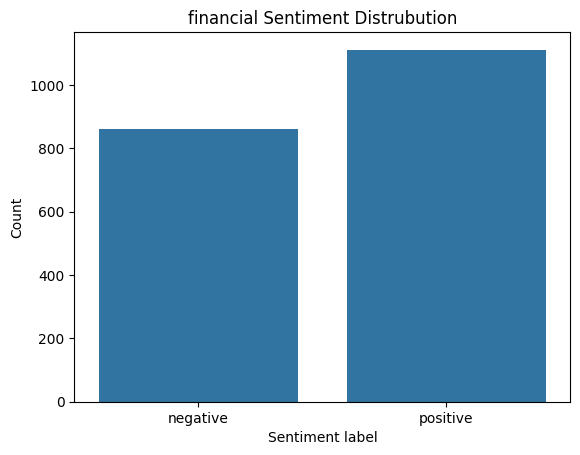

In [7]:
plt.Figure(figsize=(6,4))
sns.countplot(data=new_df, x='label',)
plt.title("financial Sentiment Distrubution")
plt.xlabel("Sentiment label")
plt.ylabel("Count")
plt.show()

In [23]:
df = new_df

In [24]:
# pip install nltk

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re

In [26]:
import nltk

# nltk.download('punkt_tab')

# nltk.data.path.append('C:/Users/Bikesh Khyaju/AppData/Roaming/nltk_data')  # just to be sure

# nltk.download('punkt')        # for word_tokenize
# nltk.download('stopwords')    # for stopword removal
# nltk.download('wordnet')      # for lemmatization
# nltk.download('omw-1.4')

# print(nltk.find('tokenizers/punkt'))
# print(nltk.find('corpora/stopwords'))
# print(nltk.find('corpora/wordnet'))
# print(nltk.find('corpora/omw-1.4'))


In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# print(word_tokenize.__module__)

nltk.tokenize


In [29]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [30]:
def preprocess(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    tokens = word_tokenize(text)  # Tokenize using punkt (correct one)
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(cleaned)

In [31]:
# from nltk.tokenize import PunktSentenceTokenizer
# import nltk.data

# tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
# print(tokenizer.tokenize("This is a test. Let's see if it works!"))

In [32]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# print(word_tokenize("This is a test sentence."))

In [33]:
# sample = "NLTK's WordNet lemmatization is finally working!"
# print(preprocess(sample))

In [34]:
df['clean_text'] = df['text'].apply(preprocess)

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df ['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
senti_model = MultinomialNB()
senti_model.fit(X_train, y_train)

MultinomialNB()

In [37]:
y_pred = senti_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.66      0.70       163
    positive       0.78      0.84      0.81       232

    accuracy                           0.76       395
   macro avg       0.76      0.75      0.75       395
weighted avg       0.76      0.76      0.76       395



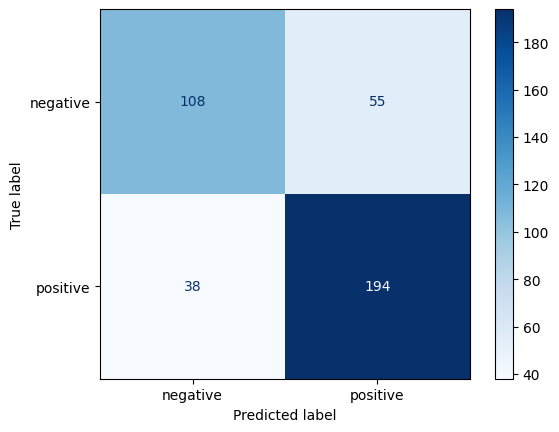

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['label'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [55]:
sample_text = "The market is in profit these days. Investors are getting high gains. they earned a lot"

# Preprocess using the same steps
sample_text_cleaned = preprocess(sample_text)

# Vectorize
sample_vector = vectorizer.transform([sample_text_cleaned])

# Predict
predicted_category = senti_model.predict(sample_vector)
print("predicted category: ", predicted_category[0])

predicted category:  positive


In [ ]:
""" 
Sentiment Analysis using Naive Bayes Classifier

streamlit for web app

training ipynb -- > model save as pickle file -- > vectorizer save as pickle file

in streamlit app, you should have preprocess function to preprocess the input text
preprocessed input text is then vectorized using the saved vectorizer

and then passed to the model for prediction
show the prediction result in the web app

"""

In [57]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(senti_model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)